<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# **Logistic regression**

The class notes state that logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable. It can be extended to several classes of events such as classfication of images.

More specifically, logistic regression calculates the probability of a data point belonging to a particular class (e.g., 0 or 1) based on a weighted sum of the input features. This probability is represented by the sigmoid function, which outputs values between 0 and 1.

The objective is to find the optimal weights (parameters) that maximize the likelihood of the observed data. The loss function for logistic regression is typically the cross-entropy loss, which penalizes incorrect classifications more heavily. The weights are then updated iteratively using gradient descent to minimize this loss, which gradually improves the model's classification accuracy.

A tutorial on datacamp.com states that logistic regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

That same tutorial points out that because of its efficient and straightforward nature, advantages of logistic regression include: it doesn't require high computation power, is easy to implement, easily interpretable, and used widely by data analysts and scientists. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

On the other hand, logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, it can't solve the non-linear problems, which is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

Below I present several examples that highlight fundamental aspects on the topic from the reading.

**Datacamp tutorial: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

## Example 1

This example demonstrates a binary classification task using logistic regression. We'll simulate a dataset where the goal is to classify data points into two categories based on their features. Using sklearn, we'll train a logistic regression model, visualize the decision boundary, and plot the probabilities for each class.

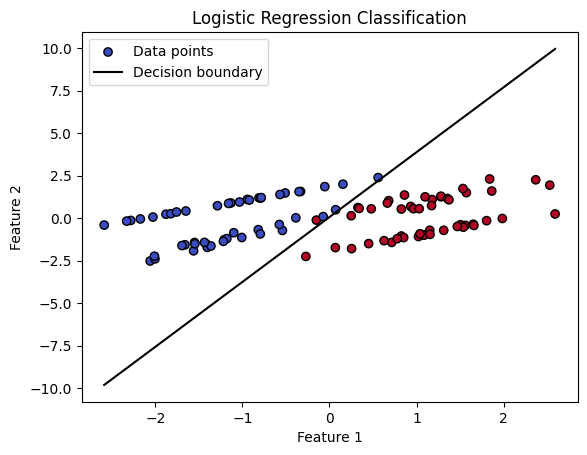

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Data points')
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(model.coef_[0][0] * x_vals + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x_vals, y_vals, label='Decision boundary', color='black')

plt.title("Logistic Regression Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Example 2

This example shows the gradient descent process for minimizing cross-entropy loss in logistic regression. Using a custom dataset, we’ll implement a simple logistic regression with manual gradient descent to optimize the weights and visualize the loss reduction over iterations.

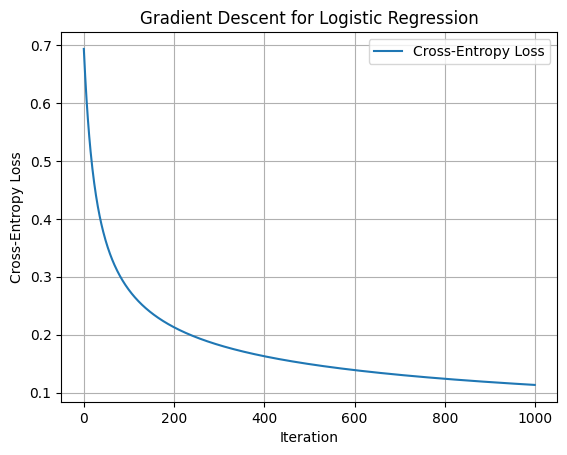

In [3]:
# Create a simple dataset
np.random.seed(0)
X = np.hstack((np.ones((100, 1)), np.random.randn(100, 1)))  # Add intercept term
y = (X[:, 1] > 0).astype(int)  # Labels based on sign of the second feature

# Sigmoid and loss functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Parameters
learning_rate = 0.1
epochs = 1000
m = X.shape[0]
weights = np.zeros(X.shape[1])
loss_history = []

# Gradient descent
for _ in range(epochs):
    y_pred = sigmoid(np.dot(X, weights))
    loss = cross_entropy_loss(y, y_pred)
    loss_history.append(loss)
    gradient = np.dot(X.T, (y_pred - y)) / m
    weights -= learning_rate * gradient

# Plot the loss over iterations
plt.plot(range(epochs), loss_history, label="Cross-Entropy Loss")
plt.title("Gradient Descent for Logistic Regression")
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.legend()
plt.show()


## Example 3

In this example, taken from datacamp.com, we train a model to predict the occurence of diabetes using data taken from the Pima Native American tribe.  We present our the results using a variety of visualization techniques: confusion matrix classification report, confusion matrix projected as a heatmap, and a Receiver Operating Characteristic (ROC) curve to plot the true positive rate against the false positive rate. Our score of $≈$ .88 (where .5 is worthless, and 1.0 is perfect) tells us that this classifier was good/useful, but perhaps not great.

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("DATA/diabetes.csv", header=0, names=col_names)

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=500000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix


from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))



                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



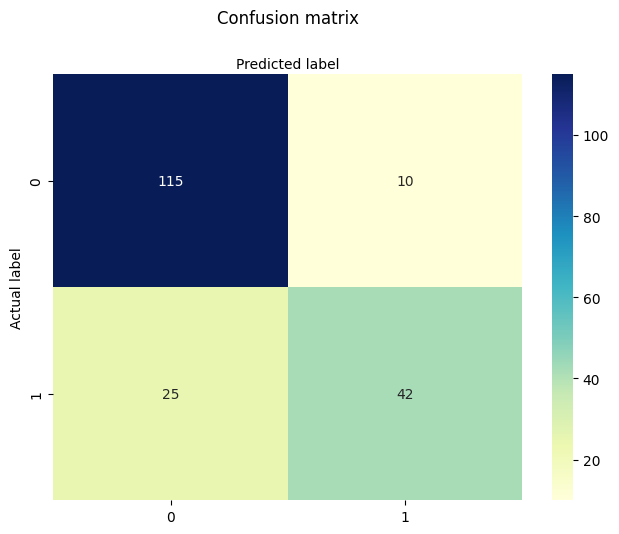

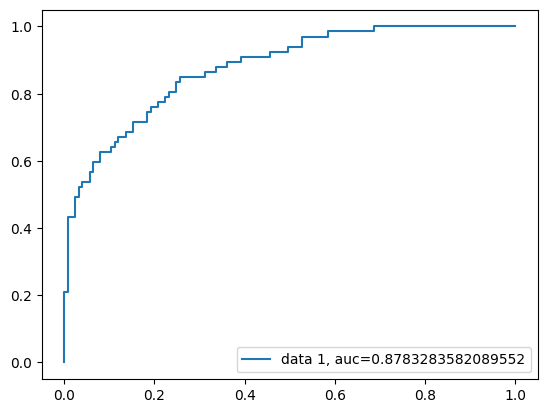

In [5]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()